In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [37]:
data=pd.read_csv('train.csv')
data.info()
data.head()
type(data)
data.shape
data.isnull().sum().head()
from sklearn.impute  import SimpleImputer
si=SimpleImputer(missing_values=np.nan, strategy='mean')
data[['year_built','energy_star_rating','direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog']]=si.fit_transform(data[['year_built','energy_star_rating','direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog']])
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['State_Factor']=le.fit_transform(data['State_Factor'])
data['building_class']=le.fit_transform(data['building_class'])
data.info()
df=data.drop(['facility_type'], axis=1)
df.info()
df.corr().style.background_gradient(cmap='PuBu')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

,Year_Factor,State_Factor,building_class,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
Year_Factor,1.000000,-0.096798,-0.026198,-0.036363,0.082688,-0.003507,0.132855,0.007913,-0.099628,-0.291137,-0.391312,-0.101799,-0.093735,-0.054079,0.051545,0.167406,-0.463176,-0.164931,-0.212332,-0.274205,-0.196895,0.114799,-0.309140,-0.097698,-0.406461,-0.103637,-0.190931,-0.408861,-0.072133,0.171693,0.338786,0.095091,0.180126,-0.078937,-0.097073,-0.144199,-0.062649,0.148017,0.360374,0.355420,-0.260890,-0.119175,-0.323793,0.032302,0.068750,-0.124418,0.182135,0.087389,-0.058627,0.137436,0.260270,0.263467,0.209500,0.185233,0.054718,-0.043701,-0.013635,0.165473,0.152557,0.167139,0.462812,-0.045179,0.534754
State_Factor,-0.096798,1.000000,0.288096,0.061200,-0.038174,-0.114483,-0.114672,-0.740626,-0.727184,-0.391280,-0.689259,-0.659538,-0.592823,-0.540011,-0.563472,-0.293470,-0.566364,-0.613088,-0.393297,0.026264,0.310017,0.092329,0.164755,0.562985,-0.353916,0.670700,0.759978,0.273593,0.513566,0.658500,0.171128,0.259843,0.408659,0.251107,-0.509631,-0.387820,-0.135173,-0.354942,-0.440472,-0.190081,-0.191690,-0.278519,0.112208,0.635556,0.705139,0.622361,0.663685,0.413849,-0.401054,0.519650,0.399572,0.167436,0.034134,0.342696,-0.136355,-0.305950,-0.046989,0.033032,0.032381,0.033002,-0.107973,0.165703,0.321324
building_class,-0.026198,0.288096,1.000000,-0.133585,0.013105,-0.089454,-0.156844,-0.129884,-0.134520,-0.072145,-0.128870,-0.149659,-0.254076,-0.089818,-0.136562,-0.191608,-0.046532,-0.145984,-0.155651,0.181144,0.144440,-0.047511,0.111976,0.154094,-0.178447,0.328327,0.255186,0.056985,0.327699,0.244431,0.018967,0.188343,0.101954,0.049015,0.032171,-0.050401,-0.174913,-0.020612,-0.131191,-0.184635,0.063898,-0.039139,0.049664,0.203827,0.144100,0.169613,0.181127,0.130294,-0.041602,-0.017638,-0.006190,-0.093145,-0.148779,0.019548,-0.125928,-0.134252,-0.019982,0.032890,0.031786,0.027573,0.006538,-0.046794,0.139222
floor_area,-0.036363,0.061200,-0.133585,1.000000,0.098502,0.029181,0.097797,-0.148467,-0.137654,-0.104118,-0.106110,-0.120068,-0.042102,-0.121068,-0.098905,-0.011865,-0.087472,-0.100034,-0.030368,-0.057491,0.011626,0.028982,-0.023443,0.056028,0.026853,-0.009108,0.039562,0.021832,-0.007137,0.038335,0.023841,-0.013697,0.046048,0.055891,-0.102459,-0.059559,0.020746,-0.112179,-0.071890,0.026904,-0.085844,-0.059289,0.004669,0.045823,0.130198,0.062634,0.092503,0.074091,-0.111303,0.136123,0.135476,0.138712,0.140324,0.049897,0.022583,-0.031415,-0.009205,-0.000011,-0.002519,-0.000589,0.009196,0.073967,-0.090856
year_built,0.082688,-0.038174,0.013105,0.098502,1.000000,-0.063192,0.040639,-0.010851,-0.031475,-0.075340,-0.000606,-0.019663,0.010073,-0.044073,-0.028950,-0.002306,-0.044101,-0.072580,-0.000833,-0.095635,-0.077449,-0.048997,-0.079485,-0.030309,0.006455,-0.091243,-0.051613,-0.035096,-0.101795,-0.047890,0.014659,-0.120819,-0.090777,-0.100311,-0.065115,-0.118891,-0.100852,-0.060207,-0.063849,-0.009163,-0.067854,-0.073546,-0.075919,-0.063867,0.069023,0.048605,-0.048449,-0.047699,-0.104711,0.045781,0.041144,0.063067,0.053132,-0.034076,-0.004366,-0.028409,-0.00

In [38]:
X=df.iloc[:,0:60]
y=df.iloc[:,61]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)
print("The X_train shape is: ", X_train.shape)
print("The y_train shape is: ", y_train.shape)
print("The X_test shape is : ", X_test.shape)
print("The y_train shape is: ",y_test.shape)

The X_train shape is:  (53029, 60)
The y_train shape is:  (53029,)
The X_test shape is :  (22728, 60)
The y_train shape is:  (22728,)


**************************************************
Test set RMSE: 72.61803
**************************************************


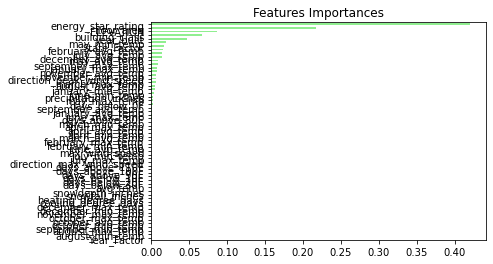

Year_Factor       : 0.000000000
State_Factor      : 0.016777074
building_class    : 0.067452283
facility_type     : 0.217036862
floor_area        : 0.047299262
year_built        : 0.420252565
energy_star_rating: 0.086807392
ELEVATION         : 0.004542387
january_min_temp  : 0.001497881
january_avg_temp  : 0.008089099
january_max_temp  : 0.000000000
february_min_temp : 0.014969872
february_avg_temp : 0.000000000
february_max_temp : 0.000000000
march_min_temp    : 0.000000000
march_avg_temp    : 0.006551405
march_max_temp    : 0.000000000
april_min_temp    : 0.000000000
april_avg_temp    : 0.000000000
april_max_temp    : 0.019971554
may_min_temp      : 0.008772780
may_avg_temp      : 0.002914844
may_max_temp      : 0.004187268
june_min_temp     : 0.000000000
june_avg_temp     : 0.001302577
june_max_temp     : 0.000000000
july_min_temp     : 0.014583045
july_avg_temp     : 0.000000000
july_max_temp     : 0.000000000
august_min_temp   : 0.004955325
august_avg_temp   : 0.000000000
august_m

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline 
ada_clf = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3, random_state=1), n_estimators=180, random_state=1)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
rmse = np.sqrt(MSE(y_pred, y_test))
print("*"*50)
print('Test set RMSE: {:.5f}'.format(rmse))
print("*"*50)
importances = pd.Series(data=ada_clf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(color='lightgreen',
                        kind='barh')
plt.title('Features Importances')
plt.show()
features = data.iloc[:,0:60]
for name, score in zip(features, ada_clf.feature_importances_):
    print("{0:18}: {1:.9f}".format(name, score))
    
X1=df[['State_Factor','State_Factor','building_class','floor_area','year_built','energy_star_rating','ELEVATION','january_min_temp','january_avg_temp','february_min_temp','march_avg_temp','april_max_temp','may_min_temp','may_avg_temp','may_max_temp','june_avg_temp','july_min_temp','august_min_temp','september_min_temp','september_avg_temp','october_max_temp','november_min_temp','december_min_temp','heating_degree_days','days_below_10F','days_below_0F','direction_max_wind_speed']]
y1=df.iloc[:,61]
X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size=0.3, random_state=1)
print("The X1_train shape is: ", X1_train.shape)
print("The y1_train shape is: ", y1_train.shape)
print("The X1_test shape is : ", X1_test.shape)
print("The y1_train shape is: ",y1_test.shape)

In [40]:
knn = KNN(n_neighbors=10)
dt = DecisionTreeRegressor(min_samples_leaf= 0.1, random_state=1)
rf=RandomForestRegressor(n_estimators=10, max_depth=3, min_samples_leaf=0.1, bootstrap=True, oob_score=True, random_state=1, verbose=1,)
regressors = [('K Nearest Neighbours', knn), ('Classification Tree', dt), ('Random Forest', rf)]
for clf_name, clf in regressors:    
    clf.fit(X1_train, y1_train)    
    y_pred = clf.predict(X1_test)
    rmse = np.sqrt(MSE(y_pred, y_test)) 
    print('{:20}: {:.5f}'.format(clf_name, rmse))

K Nearest Neighbours: 57.78939
Classification Tree : 54.43338


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Random Forest       : 55.09665


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [41]:
vc = VotingRegressor(estimators=regressors)     
vc.fit(X1_train, y1_train)   
y_pred1 = vc.predict(X1_test)
rmse = np.sqrt(MSE(y_pred1, y1_test)) 
print('Voting Classifier: {:.3f}'.format(rmse))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Voting Classifier: 53.999


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
